In [1]:
import requests
import lxml.html
from urllib.parse import quote
from selenium import webdriver
import pandas as pd
from collections import OrderedDict
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
base_url = 'http://www.yes24.com/'
book_search_url = 'searchcorner/Search?keywordAd=&keyword=&domain=ALL&qdomain=%C0%FC%C3%BC&query='
review_url = '#Review'

In [3]:
keyword = '조선의 킹 메이커'
encode_keyword = quote(keyword.encode('euckr'))

In [4]:
encode_keyword

'%C1%B6%BC%B1%C0%C7%20%C5%B7%20%B8%DE%C0%CC%C4%BF'

In [5]:
df = pd.DataFrame()

In [6]:
base_url+book_search_url+encode_keyword

'http://www.yes24.com/searchcorner/Search?keywordAd=&keyword=&domain=ALL&qdomain=%C0%FC%C3%BC&query=%C1%B6%BC%B1%C0%C7%20%C5%B7%20%B8%DE%C0%CC%C4%BF'

In [7]:
driver = webdriver.PhantomJS('C:/phantomjs-2.1.1-windows/bin/phantomjs.exe')

In [8]:
driver.get(base_url+book_search_url+encode_keyword)

In [9]:
dir(driver.find_element_by_xpath(".//p[@class='goods_name goods_icon']"))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_execute',
 '_id',
 '_parent',
 '_upload',
 '_w3c',
 'clear',
 'click',
 'find_element',
 'find_element_by_class_name',
 'find_element_by_css_selector',
 'find_element_by_id',
 'find_element_by_link_text',
 'find_element_by_name',
 'find_element_by_partial_link_text',
 'find_element_by_tag_name',
 'find_element_by_xpath',
 'find_elements',
 'find_elements_by_class_name',
 'find_elements_by_css_selector',
 'find_elements_by_id',
 'find_elements_by_link_text',
 'find_elements_by_name',
 'find_elements_by_partial_link_text',
 'find_elements_by_tag_name',
 'find_elements_by_xpath',
 'get_attribute',
 'get_property',
 'id',
 

In [10]:
goods_url = driver.find_element_by_xpath(".//p[@class='goods_name goods_icon']/a").get_attribute('href')

In [11]:
goods_url

'http://www.yes24.com/24/goods/2849385?scode=032&OzSrank=1'

In [12]:
driver.get(goods_url+review_url)

In [13]:
dir(driver)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_file_detector',
 '_is_remote',
 '_mobile',
 '_switch_to',
 '_unwrap_value',
 '_web_element_cls',
 '_wrap_value',
 'add_cookie',
 'application_cache',
 'back',
 'capabilities',
 'close',
 'command_executor',
 'create_web_element',
 'current_url',
 'current_window_handle',
 'delete_all_cookies',
 'delete_cookie',
 'desired_capabilities',
 'error_handler',
 'execute',
 'execute_async_script',
 'execute_script',
 'file_detector',
 'file_detector_context',
 'find_element',
 'find_element_by_class_name',
 'find_element_by_css_selector',
 'find_element_by_id',
 'find_element_by_link_text',
 'find_element_by_name',
 'find_eleme

In [14]:
driver.find_element_by_name('reviewlist').click()

In [15]:
for i in range(1,6):
    df = df.append(OrderedDict({'seq': str(i), 'content' : driver.find_element_by_id('FullContent'+str(i)).text}), ignore_index=True)
#     print(df['content'].str.replace('http\S+|www.\S+', '', case=False).str.replace('원문주소 : ', '', case=False).str.replace('추천\d | 댓글\d', '', case=False))    

In [16]:
df.content

0    원문주소 :\n1.조선 오백년의 기틀을 마련한 정도전.\n뚜렷한 역사 인식과 날카로...
1    원문주소 :\n  직업 관료제가 자리 잡은 현대와 달리, 봉건제하에서 왕은 신하에게...
2    원문주소 :\n 참모 - 윗사람을 도와 어떤 일을 꾀하고 꾸미는 데에 참여함 또는 ...
3    원문주소 :\n독서캠페인 추천도서라는 사실이 조금 민망할 정도록 한마디로 매우 실망...
4    원문주소 :\n500년이라는 세월을 오롯이 지켜온 왕조는 흔하지 않다. 조선의 사대...
Name: content, dtype: object

In [17]:
import re

In [18]:
df['content'] = df['content'].str.replace('http\S+|www.\S+', '', case=False).str.replace('원문주소 :', '', case=False).str.replace('추천\d | 댓글\d', '').str.replace('\|','', case=False).str.replace('\n', '', case=False)

In [19]:
df.content[0]

"1.조선 오백년의 기틀을 마련한 정도전.뚜렷한 역사 인식과 날카로운 국제정세의 판단으로 조선 태조의 창업을 이끈 명실공히 최고의 전략가이다. 이성계을 군주로 선택한 그의 탁월한 안목이 조선의 창업을 가능케 했으나, 너무나 뛰어난 재주는 오히려 그에게 독이 되었던 비운의 킹메이커.  2. 주군을 스스로 선택한 두번째 인물. 하륜태조 이성계의 아들 이방원을  조선의 3대왕으로 만든 주역으로서 세상을 보는 탁월한 안목으로 자신의 목숨을 바칠 군주로 조선 3대 임금 태종을 만들다. 두번의 피비린내 나는 권력 투쟁에서 이방원을 위해 목숨을 걸고 뛰어난 활약을 한다.  3. 청백리, 꼿꼿한 절개, 노익장으로 대표되는 조선 세종대의 대표적 관료인 황희.그의 평생을 관통하는 정치철학은 도덕 정치 그 자체이다. 집현전 학자들을 이끌 때나 정치판에서의 그의 불편부당은 적을 만들지 않는 그만의 장점이다.  4. 세조의 유혈 쿠데타를 방관하였다는 죄로 역사의 변절자로 지목되는 신숙주.그러나 그것은 변절이 아니라 정치라는 권력의 공간을 초월하고 학자이자 행정가로서 오로지 백성만을 생각하는 그의 내재된 신념이었다.  5. 중종대의 조광조.너무나 뛰어났기에 너무나 많은 적을 만들어 버린 이상주의자. 유학자로서 정치가로서 그의 머리속에는 이루어야할 욕망과 꿈이 너무 많이 들어차 있어서 적당주의, 타협이라는 처세의 단편조차 들어설 공간이 없었다. 더구나 옹졸한 군주를 만나 결국에는 내쳐지는 신세가 되고 말아 그의 이상은 한낱 꿈으로 그치고 만다.  6.민족 초유의 전란 속에서 활약의 희대의 전략가 유성룡민족의 영웅 이순신과 권율을 적재적소에 적시에 천거하여 나라를 망국의 구렁텅이에서 구해낸 절세의 전략가였다. 속좁고 옹졸했던 왕 선조를 설득해가며 나라를 구했으나 결국에는 선조로부터 배척당하고 만년에는 낙향하여 '징비록'를 남긴 만고의 충신이었다.  7. 인조대의 최명길. 명분보다는 나라의 안녕과 존속을 위해 개인의 자존심마저 버리고, 뛰어난 국제 감각으로 왕과 나라의 체통을 지킨 지혜로운

In [20]:
from konlpy.tag import Twitter

In [21]:
tagger = Twitter()

In [22]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=1000)
tdf = cv.fit_transform(df.content)

In [23]:
tdf

<5x520 sparse matrix of type '<class 'numpy.int64'>'
	with 690 stored elements in Compressed Sparse Row format>

In [24]:
from gensim.matutils import Sparse2Corpus

c:\programdata\anaconda3\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [25]:
cv.get_feature_names()

['가능',
 '가득',
 '가령',
 '가슴속',
 '가장',
 '가지',
 '각자',
 '간극',
 '간직',
 '감각',
 '개국',
 '개인',
 '개혁',
 '거리',
 '건국',
 '걸',
 '것',
 '결여',
 '결의',
 '경우',
 '곁',
 '고개',
 '공',
 '공간',
 '공감',
 '공공',
 '공신',
 '과연',
 '과정',
 '관',
 '관계',
 '관료',
 '관료제',
 '관통',
 '교육',
 '교체',
 '구렁텅이',
 '구절',
 '구조',
 '구해',
 '국가',
 '국제',
 '군수',
 '군신',
 '군주',
 '군주제',
 '굳이',
 '권력',
 '권율',
 '그',
 '그것',
 '극단',
 '급',
 '긍정',
 '기능',
 '기도',
 '기반',
 '기여',
 '기틀',
 '길',
 '까닭',
 '꼽',
 '꼿꼿',
 '꾀',
 '꿀',
 '꿈',
 '나',
 '나기',
 '나라',
 '나머지',
 '낙인',
 '낙향',
 '난국',
 '내',
 '내내',
 '내용',
 '내재',
 '너무',
 '너무나',
 '년',
 '노론',
 '노익',
 '농경',
 '누구',
 '다른',
 '다시',
 '단점',
 '단종',
 '단편',
 '달랐더',
 '달리',
 '담대',
 '당시',
 '대목',
 '대안',
 '대왕',
 '대의',
 '대통령',
 '대표',
 '대한',
 '더',
 '더구나',
 '더욱더',
 '던',
 '데',
 '도',
 '도덕',
 '도모',
 '도서',
 '도와',
 '도외',
 '독',
 '독서',
 '동안',
 '동지',
 '두번째',
 '뒤',
 '듯',
 '등',
 '등용',
 '디지털',
 '따위',
 '때',
 '때문',
 '또한',
 '뚜렷',
 '뜻',
 '라마',
 '란',
 '로부터',
 '로서',
 '록',
 '론',
 '를',
 '리더십',
 '린내',
 '마음',
 '만',
 '만고',
 '만년',
 '만들기',
 '만주족',
 '말',
 '말로',
 '망국',

In [26]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [27]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [28]:
tdf = cv.fit_transform(df.content)

In [29]:
words = cv.get_feature_names()


In [30]:
words

['관계',
 '구조',
 '군주',
 '권력',
 '나라',
 '내용',
 '누구',
 '다시',
 '대의',
 '동지',
 '로서',
 '리더십',
 '마음',
 '목숨',
 '무엇',
 '방법',
 '백년',
 '백성',
 '사람',
 '사회',
 '선조',
 '세조',
 '소통',
 '시대',
 '신권',
 '신숙주',
 '신하',
 '역사',
 '위해',
 '유성룡',
 '의미',
 '이성계',
 '인물',
 '임금',
 '자신',
 '재상',
 '전략',
 '정도전',
 '정치',
 '조광조',
 '조선',
 '참모',
 '창업',
 '채제공',
 '최명길',
 '킹메이커',
 '태조',
 '태종',
 '하륜',
 '황희']

In [31]:
import numpy

In [32]:
tdf.todense()

matrix([[ 0,  0,  4,  2,  4,  0,  1,  0,  3,  0,  3,  0,  0,  2,  0,  0,  3,
          2,  0,  0,  2,  1,  0,  0,  0,  1,  0,  2,  2,  1,  0,  2,  1,  1,
          2,  1,  4,  1,  3,  1,  7,  0,  2,  1,  1,  2,  2,  1,  1,  1],
        [ 4,  4,  2,  0,  0,  3,  1,  2,  2,  1,  0, 22,  0,  1,  3,  0,  0,
          0,  0,  6,  1,  5,  3,  4,  1,  4, 10,  1,  1,  1,  4,  0,  2,  0,
          1,  0,  0,  4,  4,  1, 10,  4,  1,  1,  1,  8,  1,  3,  2,  2],
        [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  4,  0,  1,  4,  1,  1,  2,  0,
          3,  5,  0,  1,  1,  0,  2,  0,  3,  2,  0,  1,  1,  0,  0,  0,  5,
          4,  0,  0,  2,  1,  1,  2,  2,  0,  1,  2,  0,  1,  1,  2,  1],
        [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
          0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  1,  0,  2,  1,  0,
          2,  1,  0,  3,  0,  1,  0,  1,  0,  1,  1,  0,  1,  0,  1,  1],
        [ 0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
          0

In [33]:
dir(tdf)

['__abs__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__numpy_ufunc__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_arg_min_or_max',
 '_arg_min_or_max_axis',
 '_binopt',
 '_boolean_index_to_array',
 '_check_boolean',
 '_check_ellipsis',
 '_cs_matrix__get_has_canonical_format',
 '_cs_matrix__get_sorted',
 '_cs_matrix__set_has_ca

In [34]:
count_mat = tdf.sum(axis=0)

In [35]:
count_mat

matrix([[ 5,  4,  6,  4,  5,  3,  3,  3,  5,  5,  3, 23,  4,  5,  4,  3,  3,
          5, 10,  7,  4,  7,  3,  7,  3,  9, 14,  3,  5,  4,  4,  4,  5,  7,
          9,  5,  4, 10,  8,  4, 24,  7,  3,  4,  5, 10,  5,  5,  6,  5]], dtype=int64)

In [36]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [37]:
count

array([ 5,  4,  6,  4,  5,  3,  3,  3,  5,  5,  3, 23,  4,  5,  4,  3,  3,
        5, 10,  7,  4,  7,  3,  7,  3,  9, 14,  3,  5,  4,  4,  4,  5,  7,
        9,  5,  4, 10,  8,  4, 24,  7,  3,  4,  5, 10,  5,  5,  6,  5], dtype=int64)

In [38]:
word_count = dict(zip(words, count)) # zip : 두개의 각 리스트별 원소의 짝을 지어줌

In [39]:
import operator
sorted(word_count, key=operator.itemgetter(1), reverse=True)

['황희',
 '사회',
 '위해',
 '신하',
 '소통',
 '정치',
 '동지',
 '군주',
 '태종',
 '구조',
 '선조',
 '세조',
 '태조',
 '채제공',
 '대의',
 '마음',
 '내용',
 '무엇',
 '창업',
 '자신',
 '다시',
 '목숨',
 '신숙주',
 '백성',
 '유성룡',
 '이성계',
 '조선',
 '로서',
 '재상',
 '역사',
 '방법',
 '의미',
 '인물',
 '참모',
 '최명길',
 '킹메이커',
 '하륜',
 '권력',
 '전략',
 '사람',
 '나라',
 '정도전',
 '리더십',
 '시대',
 '백년',
 '임금',
 '신권',
 '누구',
 '조광조',
 '관계']

In [40]:
%matplotlib inline

In [41]:
from wordcloud import WordCloud
from matplotlib import pyplot

In [88]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=50)

In [89]:
word_count

{'관계': 5,
 '구조': 4,
 '군주': 6,
 '권력': 4,
 '나라': 5,
 '내용': 3,
 '누구': 3,
 '다시': 3,
 '대의': 5,
 '동지': 5,
 '로서': 3,
 '리더십': 23,
 '마음': 4,
 '목숨': 5,
 '무엇': 4,
 '방법': 3,
 '백년': 3,
 '백성': 5,
 '사람': 10,
 '사회': 7,
 '선조': 4,
 '세조': 7,
 '소통': 3,
 '시대': 7,
 '신권': 3,
 '신숙주': 9,
 '신하': 14,
 '역사': 3,
 '위해': 5,
 '유성룡': 4,
 '의미': 4,
 '이성계': 4,
 '인물': 5,
 '임금': 7,
 '자신': 9,
 '재상': 5,
 '전략': 4,
 '정도전': 10,
 '정치': 8,
 '조광조': 4,
 '조선': 24,
 '참모': 7,
 '창업': 3,
 '채제공': 4,
 '최명길': 5,
 '킹메이커': 10,
 '태조': 5,
 '태종': 5,
 '하륜': 6,
 '황희': 5}

In [90]:
cloud = wc.generate_from_frequencies(word_count)

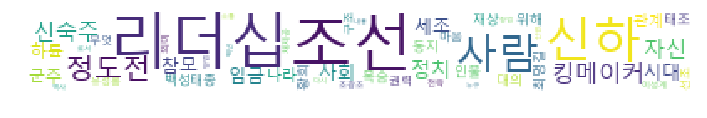

In [91]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [92]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0) # 상관계수 구하기(rowvar =0 : 컬럼단위 상관계수, 1이면 문서간의 상관계수)

In [93]:
word_corr

array([[ 1.        ,  0.96824584,  0.16137431, ...,  0.94280904,
         0.69006556,  0.81649658],
       [ 0.96824584,  1.        ,  0.25      , ...,  0.91287093,
         0.53452248,  0.79056942],
       [ 0.16137431,  0.25      ,  1.        , ...,  0.45643546,
         0.13363062,  0.39528471],
       ..., 
       [ 0.94280904,  0.91287093,  0.45643546, ...,  1.        ,
         0.73192505,  0.8660254 ],
       [ 0.69006556,  0.53452248,  0.13363062, ...,  0.73192505,
         1.        ,  0.84515425],
       [ 0.81649658,  0.79056942,  0.39528471, ...,  0.8660254 ,
         0.84515425,  1.        ]])

In [94]:
edges = []
for i in range(len(words)): 
    for j in range(i + 1, len(words)): 
        edges.append((words[i], words[j], word_corr[i, j])) # 1이 아닌 및부분의 상관계수 추리기

In [95]:
edges

[('관계', '구조', 0.96824583655185437),
 ('관계', '군주', 0.16137430609197578),
 ('관계', '권력', -0.52704627669473003),
 ('관계', '나라', -0.41666666666666674),
 ('관계', '내용', 0.96824583655185403),
 ('관계', '누구', 0.26352313834736496),
 ('관계', '다시', 0.96824583655185403),
 ('관계', '대의', 0.30618621784789724),
 ('관계', '동지', 0.25000000000000006),
 ('관계', '로서', -0.32274861218395134),
 ('관계', '리더십', 0.97840609207662754),
 ('관계', '마음', -1.7916147020621909e-17),
 ('관계', '목숨', 0.0),
 ('관계', '무엇', 0.99631674623260735),
 ('관계', '방법', -0.16137430609197567),
 ('관계', '백년', -0.32274861218395134),
 ('관계', '백성', -0.20412414523193151),
 ('관계', '사람', -0.30772872744833185),
 ('관계', '사회', 0.94096581588635109),
 ('관계', '선조', 0.17251638983558856),
 ('관계', '세조', 0.97448058118198322),
 ('관계', '소통', 0.96824583655185403),
 ('관계', '시대', 0.94884014409573714),
 ('관계', '신권', 0.16137430609197578),
 ('관계', '신숙주', 0.87841046115788335),
 ('관계', '신하', 0.98896102662119556),
 ('관계', '역사', 0.16137430609197578),
 ('관계', '위해', 0.0),
 ('관계', '유성

In [96]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True) # 상관게수가 높은걸로 정렬

In [97]:
edges

[('군주', '역사', 1.0),
 ('군주', '창업', 1.0),
 ('내용', '소통', 1.0),
 ('로서', '백년', 1.0),
 ('역사', '창업', 1.0),
 ('유성룡', '조광조', 1.0),
 ('유성룡', '채제공', 1.0),
 ('조광조', '채제공', 1.0),
 ('구조', '내용', 0.99999999999999989),
 ('구조', '소통', 0.99999999999999989),
 ('구조', '의미', 0.99999999999999989),
 ('내용', '의미', 0.99999999999999989),
 ('로서', '전략', 0.99999999999999989),
 ('목숨', '태조', 0.99999999999999989),
 ('백년', '전략', 0.99999999999999989),
 ('소통', '의미', 0.99999999999999989),
 ('시대', '참모', 0.99999999999999989),
 ('리더십', '소통', 0.99901058647981),
 ('구조', '리더십', 0.99901058647980989),
 ('내용', '리더십', 0.99901058647980989),
 ('리더십', '의미', 0.99901058647980989),
 ('관계', '무엇', 0.99631674623260735),
 ('리더십', '신하', 0.99022484246591735),
 ('관계', '신하', 0.98896102662119556),
 ('군주', '대의', 0.98821176880261852),
 ('대의', '역사', 0.98821176880261852),
 ('대의', '창업', 0.98821176880261852),
 ('내용', '사회', 0.98611686456942582),
 ('다시', '무엇', 0.98611686456942582),
 ('사회', '소통', 0.98611686456942571),
 ('구조', '사회', 0.98611686456942549),
 ('사

In [130]:
len(edges)

1225

In [98]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

In [53]:
edge_list[0][0]

'군주'

In [99]:
edge_list

[('군주', '역사'),
 ('군주', '창업'),
 ('내용', '소통'),
 ('로서', '백년'),
 ('역사', '창업'),
 ('유성룡', '조광조'),
 ('유성룡', '채제공'),
 ('조광조', '채제공'),
 ('구조', '내용'),
 ('구조', '소통'),
 ('구조', '의미'),
 ('내용', '의미'),
 ('로서', '전략'),
 ('목숨', '태조'),
 ('백년', '전략'),
 ('소통', '의미'),
 ('시대', '참모'),
 ('리더십', '소통'),
 ('구조', '리더십'),
 ('내용', '리더십'),
 ('리더십', '의미'),
 ('관계', '무엇'),
 ('리더십', '신하'),
 ('관계', '신하'),
 ('군주', '대의'),
 ('대의', '역사'),
 ('대의', '창업'),
 ('내용', '사회'),
 ('다시', '무엇'),
 ('사회', '소통'),
 ('구조', '사회'),
 ('사회', '의미'),
 ('구조', '신하'),
 ('내용', '신하'),
 ('소통', '신하'),
 ('신하', '의미'),
 ('세조', '태종'),
 ('리더십', '사회'),
 ('관계', '리더십'),
 ('무엇', '신하'),
 ('리더십', '세조'),
 ('관계', '세조'),
 ('세조', '킹메이커'),
 ('사회', '신하'),
 ('세조', '소통'),
 ('내용', '세조'),
 ('세조', '의미'),
 ('구조', '세조'),
 ('마음', '임금'),
 ('다시', '시대'),
 ('다시', '참모'),
 ('관계', '구조'),
 ('관계', '의미'),
 ('구조', '킹메이커'),
 ('나라', '전략'),
 ('동지', '마음'),
 ('의미', '킹메이커'),
 ('관계', '내용'),
 ('관계', '다시'),
 ('관계', '소통'),
 ('나라', '로서'),
 ('나라', '백년'),
 ('내용', '킹메이커'),
 ('소통', '킹메이커'),
 ('리더십', '킹메이커')

In [100]:
weight_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99901058647981,
 0.99901058647980989,
 0.99901058647980989,
 0.99901058647980989,
 0.99631674623260735,
 0.99022484246591735,
 0.98896102662119556,
 0.98821176880261852,
 0.98821176880261852,
 0.98821176880261852,
 0.98611686456942582,
 0.98611686456942582,
 0.98611686456942571,
 0.98611686456942549,
 0.98611686456942549,
 0.98491617929624897,
 0.98491617929624897,
 0.98491617929624897,
 0.98491617929624886,
 0.98437403869769735,
 0.98267956505418419,
 0.97840609207662754,
 0.97593444712557331,
 0.97572589213531669,
 0.97448058118198322,
 0.97448058118198322,
 0.9712424545913152,
 0.97049495883094594,
 0.97049495883094583,
 0.97049495883094572,
 0.97049495883094561,
 0.97049495883094561,
 0.96882200193253842,
 0.96882200193253842,
 0.9682458

In [101]:
import networkx

In [102]:
G = networkx.Graph() # 그래프 생성

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight) # 노드간의 연결선을 추가(단어간의 관계)
    edge_set.add((word1, word2))

In [103]:
networkx.degree(G)

{'관계': 49,
 '구조': 49,
 '군주': 49,
 '권력': 49,
 '나라': 49,
 '내용': 49,
 '누구': 49,
 '다시': 49,
 '대의': 49,
 '동지': 49,
 '로서': 49,
 '리더십': 49,
 '마음': 49,
 '목숨': 49,
 '무엇': 49,
 '방법': 49,
 '백년': 49,
 '백성': 49,
 '사람': 49,
 '사회': 49,
 '선조': 49,
 '세조': 49,
 '소통': 49,
 '시대': 49,
 '신권': 49,
 '신숙주': 49,
 '신하': 49,
 '역사': 49,
 '위해': 49,
 '유성룡': 49,
 '의미': 49,
 '이성계': 49,
 '인물': 49,
 '임금': 49,
 '자신': 49,
 '재상': 49,
 '전략': 49,
 '정도전': 49,
 '정치': 49,
 '조광조': 49,
 '조선': 49,
 '참모': 49,
 '창업': 49,
 '채제공': 49,
 '최명길': 49,
 '킹메이커': 49,
 '태조': 49,
 '태종': 49,
 '하륜': 49,
 '황희': 49}

In [104]:
G.size()

1225

In [105]:
nodes = G.nodes()

In [106]:
a = G.degree()

In [107]:
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_cycle',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_path',
 'add_star',
 'add_weighted_edges_from',
 'adj',
 'adjacency_iter',
 'adjacency_list',
 'adjlist_dict_factory',
 'clear',
 'copy',
 'degree',
 'degree_iter',
 'edge',
 'edge_attr_dict_factory',
 'edges',
 'edges_iter',
 'get_edge_data',
 'graph',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'neighbors_iter',
 'node',
 'node_dict_factory',
 'nodes',
 'nodes_iter',
 'nodes_with_selfloops',
 'number_of_edges',
 'number_of_nod

In [108]:
G.degree(weight='weight')

{'관계': 17.448030634000229,
 '구조': 16.554287073011498,
 '군주': 15.23140278878609,
 '권력': -7.3499934741310184,
 '나라': 3.8562317655144014,
 '내용': 16.554287073011498,
 '누구': 6.9830219016066479,
 '다시': 17.170170634892074,
 '대의': 17.174037222210234,
 '동지': 4.8046610476832425,
 '로서': 6.4542592522803348,
 '리더십': 16.795069339112047,
 '마음': 0.23176712376114617,
 '목숨': 13.347658797402861,
 '무엇': 17.485705015141626,
 '방법': -7.38392347278503,
 '백년': 6.4542592522803348,
 '백성': 4.8830443987178347,
 '사람': -13.542918859672573,
 '사회': 14.451052052859861,
 '선조': 17.010506691733621,
 '세조': 19.802551191414548,
 '소통': 16.554287073011498,
 '시대': 15.482468571709896,
 '신권': -7.4542376565866091,
 '신숙주': 18.148961361426696,
 '신하': 15.608542112784239,
 '역사': 15.23140278878609,
 '위해': 10.67714760838418,
 '유성룡': 14.231381193092368,
 '의미': 16.554287073011498,
 '이성계': -3.9023783538210459,
 '인물': 9.3232680386334223,
 '임금': -1.3490086038782598,
 '자신': 3.6348352715075438,
 '재상': -18.983125181946832,
 '전략': 6.454259252280

In [114]:
dir(edges)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [115]:
len(edges[0])

3

In [116]:
len(edges)

1225

In [117]:
nodes_dict = [{"id":n} for n in nodes]
node_map = dict(zip(nodes,range(len(nodes)))) # map to indices for source/target in edges
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]],"value": edges[i][2]} for i in range(len(edges))]

In [118]:
nodes_dict

[{'id': '군주'},
 {'id': '역사'},
 {'id': '창업'},
 {'id': '내용'},
 {'id': '소통'},
 {'id': '로서'},
 {'id': '백년'},
 {'id': '유성룡'},
 {'id': '조광조'},
 {'id': '채제공'},
 {'id': '구조'},
 {'id': '의미'},
 {'id': '전략'},
 {'id': '목숨'},
 {'id': '태조'},
 {'id': '시대'},
 {'id': '참모'},
 {'id': '리더십'},
 {'id': '관계'},
 {'id': '무엇'},
 {'id': '신하'},
 {'id': '대의'},
 {'id': '사회'},
 {'id': '다시'},
 {'id': '세조'},
 {'id': '태종'},
 {'id': '킹메이커'},
 {'id': '마음'},
 {'id': '임금'},
 {'id': '나라'},
 {'id': '동지'},
 {'id': '방법'},
 {'id': '사람'},
 {'id': '자신'},
 {'id': '최명길'},
 {'id': '신숙주'},
 {'id': '하륜'},
 {'id': '정치'},
 {'id': '정도전'},
 {'id': '황희'},
 {'id': '누구'},
 {'id': '조선'},
 {'id': '선조'},
 {'id': '백성'},
 {'id': '위해'},
 {'id': '인물'},
 {'id': '이성계'},
 {'id': '권력'},
 {'id': '재상'},
 {'id': '신권'}]

In [119]:
edges_dict

[{'source': 0, 'target': 1, 'value': 1.0},
 {'source': 0, 'target': 2, 'value': 1.0},
 {'source': 3, 'target': 4, 'value': 1.0},
 {'source': 5, 'target': 6, 'value': 1.0},
 {'source': 1, 'target': 2, 'value': 1.0},
 {'source': 7, 'target': 8, 'value': 1.0},
 {'source': 7, 'target': 9, 'value': 1.0},
 {'source': 8, 'target': 9, 'value': 1.0},
 {'source': 10, 'target': 3, 'value': 0.99999999999999989},
 {'source': 10, 'target': 4, 'value': 0.99999999999999989},
 {'source': 10, 'target': 11, 'value': 0.99999999999999989},
 {'source': 3, 'target': 11, 'value': 0.99999999999999989},
 {'source': 5, 'target': 12, 'value': 0.99999999999999989},
 {'source': 13, 'target': 14, 'value': 0.99999999999999989},
 {'source': 6, 'target': 12, 'value': 0.99999999999999989},
 {'source': 4, 'target': 11, 'value': 0.99999999999999989},
 {'source': 15, 'target': 16, 'value': 0.99999999999999989},
 {'source': 17, 'target': 4, 'value': 0.99901058647981},
 {'source': 10, 'target': 17, 'value': 0.999010586479809

In [120]:
node_map

{'관계': 18,
 '구조': 10,
 '군주': 0,
 '권력': 47,
 '나라': 29,
 '내용': 3,
 '누구': 40,
 '다시': 23,
 '대의': 21,
 '동지': 30,
 '로서': 5,
 '리더십': 17,
 '마음': 27,
 '목숨': 13,
 '무엇': 19,
 '방법': 31,
 '백년': 6,
 '백성': 43,
 '사람': 32,
 '사회': 22,
 '선조': 42,
 '세조': 24,
 '소통': 4,
 '시대': 15,
 '신권': 49,
 '신숙주': 35,
 '신하': 20,
 '역사': 1,
 '위해': 44,
 '유성룡': 7,
 '의미': 11,
 '이성계': 46,
 '인물': 45,
 '임금': 28,
 '자신': 33,
 '재상': 48,
 '전략': 12,
 '정도전': 38,
 '정치': 37,
 '조광조': 8,
 '조선': 41,
 '참모': 16,
 '창업': 2,
 '채제공': 9,
 '최명길': 34,
 '킹메이커': 26,
 '태조': 14,
 '태종': 25,
 '하륜': 36,
 '황희': 39}

In [121]:
from networkx import connected_components
connected_components(G)

<generator object connected_components at 0x000000000F8C1468>

In [122]:
dir(connected_components(G))

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [123]:
networkx.get_node_attributes(G,'group')

{}

In [124]:
aa = networkx.betweenness_centrality(G)

In [125]:
edge_list

[('군주', '역사'),
 ('군주', '창업'),
 ('내용', '소통'),
 ('로서', '백년'),
 ('역사', '창업'),
 ('유성룡', '조광조'),
 ('유성룡', '채제공'),
 ('조광조', '채제공'),
 ('구조', '내용'),
 ('구조', '소통'),
 ('구조', '의미'),
 ('내용', '의미'),
 ('로서', '전략'),
 ('목숨', '태조'),
 ('백년', '전략'),
 ('소통', '의미'),
 ('시대', '참모'),
 ('리더십', '소통'),
 ('구조', '리더십'),
 ('내용', '리더십'),
 ('리더십', '의미'),
 ('관계', '무엇'),
 ('리더십', '신하'),
 ('관계', '신하'),
 ('군주', '대의'),
 ('대의', '역사'),
 ('대의', '창업'),
 ('내용', '사회'),
 ('다시', '무엇'),
 ('사회', '소통'),
 ('구조', '사회'),
 ('사회', '의미'),
 ('구조', '신하'),
 ('내용', '신하'),
 ('소통', '신하'),
 ('신하', '의미'),
 ('세조', '태종'),
 ('리더십', '사회'),
 ('관계', '리더십'),
 ('무엇', '신하'),
 ('리더십', '세조'),
 ('관계', '세조'),
 ('세조', '킹메이커'),
 ('사회', '신하'),
 ('세조', '소통'),
 ('내용', '세조'),
 ('세조', '의미'),
 ('구조', '세조'),
 ('마음', '임금'),
 ('다시', '시대'),
 ('다시', '참모'),
 ('관계', '구조'),
 ('관계', '의미'),
 ('구조', '킹메이커'),
 ('나라', '전략'),
 ('동지', '마음'),
 ('의미', '킹메이커'),
 ('관계', '내용'),
 ('관계', '다시'),
 ('관계', '소통'),
 ('나라', '로서'),
 ('나라', '백년'),
 ('내용', '킹메이커'),
 ('소통', '킹메이커'),
 ('리더십', '킹메이커')

In [126]:
list(set(weight_list))

[0.98611686456942582,
 1.0,
 0.91287092917527701,
 0.375,
 0.25,
 0.0625,
 0.86066296582387025,
 0.5270462766947297,
 0.32274861218395134,
 0.7784989441615231,
 0.0,
 -0.375,
 -0.47642754735104009,
 -0.43128369535497574,
 -0.875,
 -0.055479504109148252,
 -0.39620290784653073,
 -0.44444444444444436,
 -0.59292706128157091,
 -0.68465319688145776,
 -0.44888836826690454,
 -0.02585438449975095,
 -0.050251890762960529,
 2.388819602749588e-17,
 2.5337258102033828e-17,
 -0.39528470752104733,
 -0.45916047664555487,
 0.24946109012559339,
 0.2462290448240623,
 0.14101901870444158,
 0.062500000000000028,
 0.10206207261596581,
 3.204937810639273e-17,
 -0.30618621784789724,
 3.9252311467094385e-17,
 -0.10564428184106456,
 -0.30151134457776363,
 -0.79056941504209466,
 0.3774147062120346,
 0.49009802940980324,
 0.45643546458763856,
 0.25000000000000006,
 0.34299717028501769,
 0.39528470752104733,
 -0.13005121775247103,
 -0.13921151159742612,
 -0.20412414523193151,
 -0.24999999999999994,
 0.675520529473

In [132]:
weight_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99999999999999989,
 0.99901058647981,
 0.99901058647980989,
 0.99901058647980989,
 0.99901058647980989,
 0.99631674623260735,
 0.99022484246591735,
 0.98896102662119556,
 0.98821176880261852,
 0.98821176880261852,
 0.98821176880261852,
 0.98611686456942582,
 0.98611686456942582,
 0.98611686456942571,
 0.98611686456942549,
 0.98611686456942549,
 0.98491617929624897,
 0.98491617929624897,
 0.98491617929624897,
 0.98491617929624886,
 0.98437403869769735,
 0.98267956505418419,
 0.97840609207662754,
 0.97593444712557331,
 0.97572589213531669,
 0.97448058118198322,
 0.97448058118198322,
 0.9712424545913152,
 0.97049495883094594,
 0.97049495883094583,
 0.97049495883094572,
 0.97049495883094561,
 0.97049495883094561,
 0.96882200193253842,
 0.96882200193253842,
 0.9682458

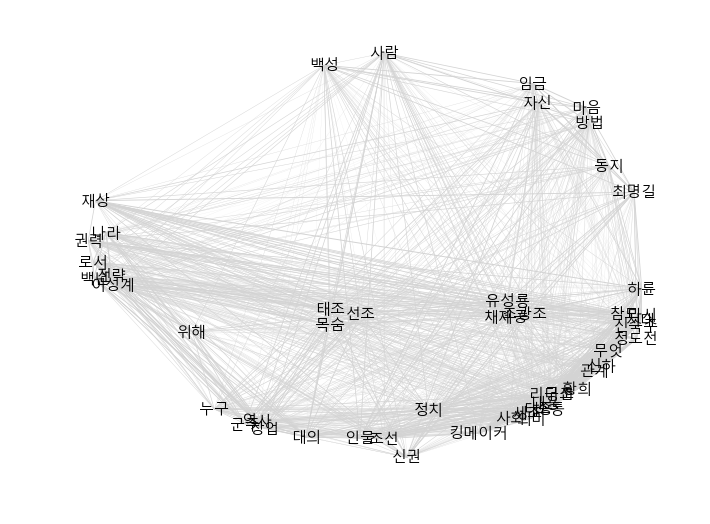

In [131]:
# spring_layout : edge를 스프링처럼 사용하여 단어간의 자성이 있는 것처럼 밀어내거나 당기는 물리학 시뮬레이션으로 위치를 나타냄
# 서로 연결이 잘 되있을수록 가깝게 연결되어 나옴
# 항상 랜덤이다
# iterations 가 커질수록 안정적으로 나온다.
position = networkx.spring_layout(G, iterations=30) 
pyplot.figure(figsize=(12, 9)) # 그래프 크기
networkx.draw_networkx_nodes(G, position, node_size=0) # 노드추가
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray') # edge 추가
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic') # 노드의 단어
pyplot.axis('off')
pyplot.show()

In [ ]:
corpus = Sparse2Corpus(tdf.T)

In [ ]:
from gensim.models.ldamodel import LdaModel

In [ ]:
lda = LdaModel(corpus=corpus, num_topics=100, id2word=dict(enumerate(words)))